<a href="https://colab.research.google.com/github/Afzal786/Soft_Computing/blob/master/MIT2019072_SOC2020_ANN2_Assignment4_XNOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

#defining the input for the X-NOR operation
X = np.array([0,0,0,1,1,0,1,1]).reshape(4,2)

#Actual output of the X-NOR operation
y = np.array([1,0,0,1]).reshape(4,1)

#Forming the data-set by combining the x and y 
X_new  = np.vstack((X.T,y.T)).T

#Creating the dataframe  
dataframe = pd.DataFrame(data=X_new, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0              0              0      1
1              0              1      0
2              1              0      0
3              1              1      1


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


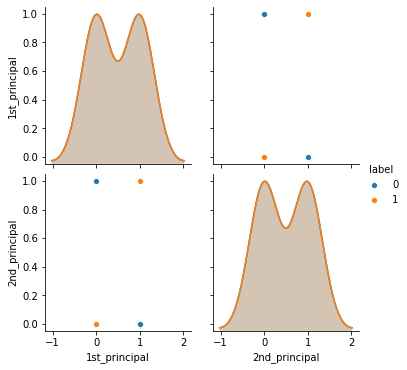

In [4]:
#Exploratory data Analysis by forming the pairplot of the data-set
sns.pairplot( data=dataframe, vars=('1st_principal', '2nd_principal'), hue='label' )

In [5]:
# The number of input is equal to number of columns in data-set
num_inputs = len(X[0])

# It defines the number of neurons in hidden layer
hidden_layer_neurons = 2

np.random.seed(4)

#initializing the w1 weights present between input layer and hidden layer
w1 = 2*np.random.random((num_inputs, hidden_layer_neurons)) -1
w1

array([[0.93405968, 0.0944645 ],
       [0.94536872, 0.42963199]])

In [6]:
# The number of input is equal to number of classifying units
num_outputs = len(y[0])

#initializing the w1 weights present between hidden layer and output layer
w2 = 2*np.random.random((hidden_layer_neurons, num_outputs)) - 1
w2

array([[ 0.39545765],
       [-0.56782101]])

In [7]:
learning_rate = 0.2 # slowly update the network
for epoch in range(50000):
    l1 = 1/(1 + np.exp(-(np.dot(X, w1)))) # sigmoid function
    l2 = 1/(1 + np.exp(-(np.dot(l1, w2)))) #sigmoid fucntion
    er = (abs(y - l2)).mean() #calculating the error
    l2_delta = (y - l2)*(l2 * (1-l2)) #using back-propagation calculating the derivative of the function
    l1_delta = l2_delta.dot(w2.T) * (l1 * (1-l1)) #using back-propagation calculating the derivative of the function
    w2 += l1.T.dot(l2_delta) * learning_rate #modifying the weights 
    w1 += X.T.dot(l1_delta) * learning_rate

print('Error:', er) #printing the error

Error: 0.06661118265848019


In [15]:
#Testing for input (1,1)
#desired output for this is 1 

print("Weights between input layer and hidden layer : ")
print(w1)

print("Weights between hidden layer and output layer : ")
print(w2)


X1 = np.array([1,1]).reshape(1,2)
l1 = 1/(1 + np.exp(-(np.dot(X1, w1)))) #layer 1
l2 = 1/(1 + np.exp(-(np.dot(l1, w2)))) #layer 2
 
np.round(l2,3) #output obtained from the layer

Weights between input layer and hidden layer : 
[[7.70717921 0.92574951]
 [7.70858143 0.92575207]]
Weights between hidden layer and output layer : 
[[-26.16813943]
 [ 32.90790659]]


array([[0.907]])

In [12]:
#using sigmoid functions predicting the output
if l2>0.5:
  yp = 1
else:
  yp = 0


#Checking whether output obtained is correct or not
res = yp == y[3]
correct = np.sum(res)/len(res)


print('Correct:',sum(res),'/',len(res), ':', (correct*100),'%')

Correct: 1 / 1 : 100.0 %


In [0]:
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

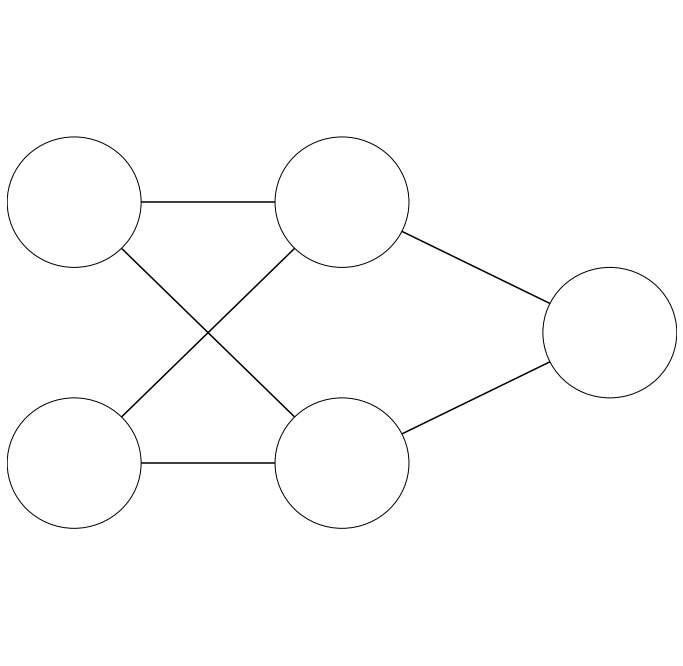

In [14]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [2,2,1])